# Introducing the Sw00pGenerator3000 (SG3K)

The Sw00pGenerator3000, or SG3K, is a cutting-edge GPS analysis tool meticulously crafted to empower swoopers at every level of expertise. Whether you're taking your first plunge into the exhilarating world of swooping or you're a seasoned competitor seeking continuous improvement, the SG3K is your key to accelerating your learning curve. With this advanced tool, you can make remarkable progress in refining your performance while minimizing the number of jumps needed. But wait, what's swooping without FlySight? FlySight is not your ordinary GPS; it's tailor-made for wingsuit pilots and introduces a revolutionary feature. Providing real-time audible indications of glide ratio, horizontal, or vertical speed, FlySight takes your flying experience to new heights. For more detailed information on FlySight, check out this [link](https://github.com/flysight/flysight). Thanks to the flysight we can visualize our swoop and get the following information out of it.

In [1]:
%%capture
import io
import import_ipynb

from sg3k_basic import *
from ipywidgets import widgets
from IPython.display import display

Please **upload** a tracking file from your Flysight device, compatible with either Gen 1 or Gen 2 models.

In [2]:
uploader = widgets.FileUpload(
    accept='*.csv',
    multiple=False
)
display(uploader)

FileUpload(value=(), accept='*.csv', description='Upload')

In [3]:
jump_df = DatasetService(file = io.BytesIO(uploader.value[0].content.tobytes())).create_jump_data()
if jump_df is not None:
    display(jump_df.head())

,timestamp,time_sec,lat,lon,elevation,horz_distance_ft,horz_distance_m,x_axis_distance_ft,x_axis_distance_m,y_axis_distance_ft,y_axis_distance_m,vert_speed_mph,horz_speed_mph,vert_speed_km/u,horz_speed_km/u,dive_angle,name,user_id
0,2024-06-29 07:43:14.400000+00:00,0.0,50.852594,3.150388,18.979659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.185576,0.474526,-1.908,0.763675,-68.186287,D06-29-2024T0743v1,None
1,2024-06-29 07:43:14.600000+00:00,0.2,50.852594,3.150388,19.284777,0.129587,0.039498,-0.069506,-0.021185,0.109309,0.033317,-1.051360,0.382248,-1.692,0.615168,-70.020018,D06-29-2024T0743v1,None
2,2024-06-29 07:43:14.800000+00:00,0.4,50.852595,3.150388,19.425853,0.206152,0.062835,-0.092749,-0.028270,0.182228,0.055543,-0.917144,0.380936,-1.476,0.613058,-67.444402,D06-29-2024T0743v1,None
3,2024-06-29 07:43:15+00:00,0.6,50.852595,3.150388,19.468504,0.292543,0.089167,-0.046709,-0.014237,0.255289,0.077812,-0.671081,0.360695,-1.080,0.580483,-61.742688,D06-29-2024T0743v1,None
4,2024-06-29 07:43:15.200000+00:00,0.8,50.852595,3.150388,19.570210,0.402037,0.122541,-0.046931,-0.014305,0.364738,0.111172,-1.207945,0.631514,-1.944,1.016323,-62.399441,D06-29-2024T0743v1,None


## Flight Analysis Metrics

The Sw00pGenerator3000 provides a comprehensive set of metrics to help you refine your swooping skills. Below are the key performance indicators for your recent flight:

In [4]:
landing_service = LandingService(jump_df)
if hasattr(landing_service, 'landing_df'):
    print(textwrap.dedent(landing_service.get_landing_data('km/u', 'm')).strip())

exited airplane:      8505.2 ft AGL
initiated turn:       474.1 ft AGL, 22.4 m back, -108.9 m offset
max vertical speed:   141.0 ft AGL, 82.6 m back, -33.3 m offset (78.0 km/u)
started rollout:      141.0 ft AGL, 82.6 m back, -33.3 m offset (78.0 km/u)
finished rollout:     0.0 ft AGL, 0.0 m back, 0.0 m offset
max horizontal speed: 24.8 ft AGL, 47.5 m back, -13.3 m offset (87.8 km/u)

degrees of rotation:      ---- deg (--- -hand)
time to execute turn:     7.2 sec
time during rollout:      4.2 sec
time aloft during swoop:  5.4 sec

entry gate speed:      69 km/u
distance to stop:      53 m


## Visualisations

The Sw00pGenerator3000 provides a range of visualisations to help you gain a deeper understanding of your flight. These visualisations offer a detailed breakdown of your performance, allowing you to identify areas for improvement and refine your skills.

In [5]:
# Select the Start Elevation to ensure the correct beginning of the landing pattern is displayed.
start_elevation = 1100

### Overview

This provides a comprehensive overview of the maneuver, displaying elevation, horizontal speed, vertical speed, and the dive angle. Additionally, two vertical lines are incorporated to offer more information regarding the commencement and conclusion of the rollout.

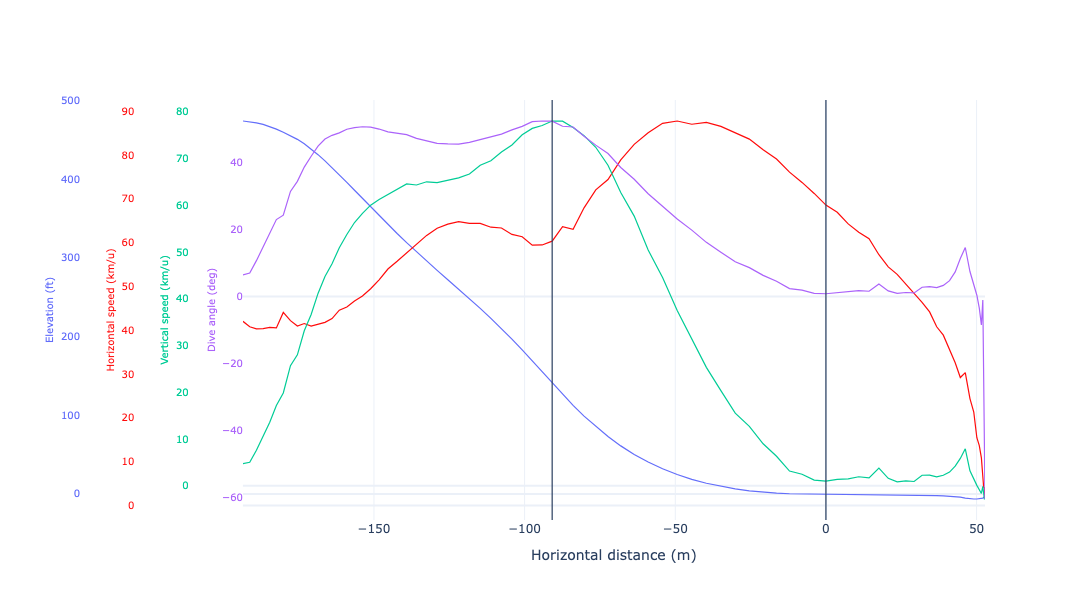

In [6]:
landing_viz = LandingVisualisations(df=jump_df, start_elevation=start_elevation, speed_metric='km/u', distance_metric='m')
landing_viz.plt_overview(['Elevation', 'Horizontal speed', 'Vertical speed', 'Dive angle'])

### Side View Of Flight Path

A profile view of the flight path: This perspective offers a clear observation of the landing's rollout, revealing the steepness and proximity to the gate during the approach. Additionally, it provides insight into the altitude at which the maneuver was initiated.

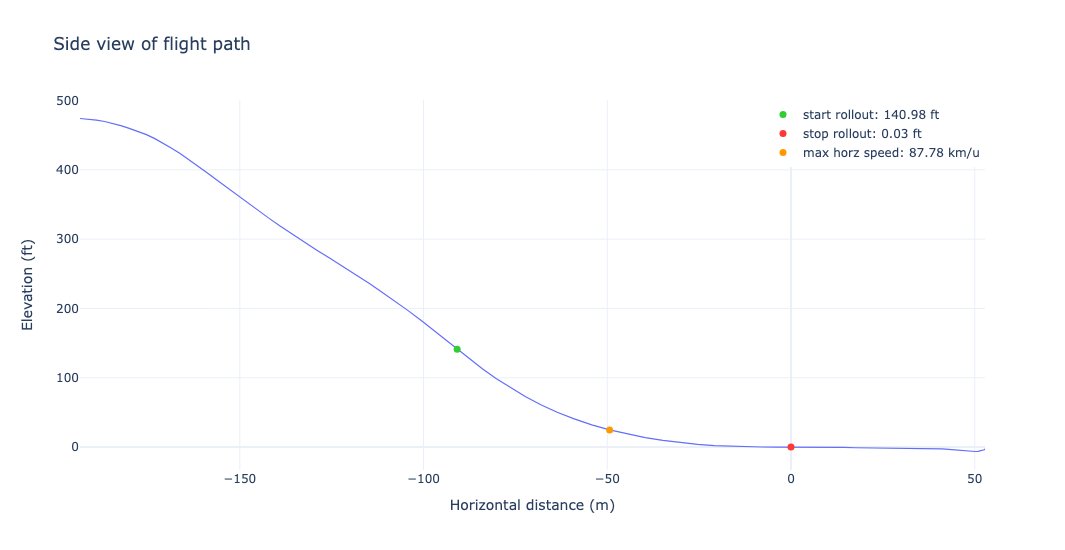

In [7]:
landing_viz.plt_side_view()

### Overhead View Of Flight Path

Get a bird's-eye view of your flight trajectory, providing a unique perspective on your performance.

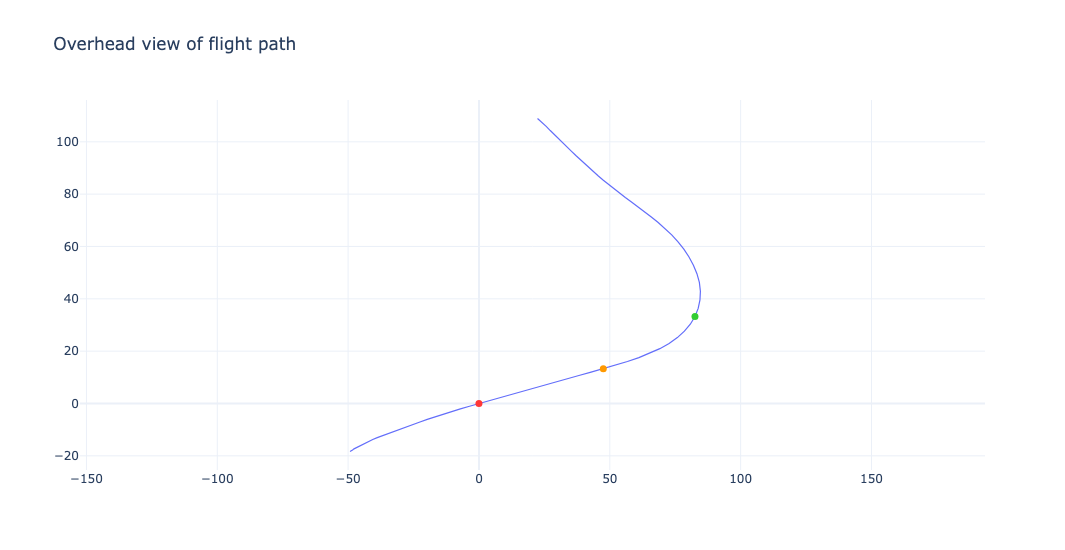

In [8]:
landing_viz.plt_overhead()

### Map

See your flight trajectory overlaid on satellite imagery, giving you a real-world perspective on your flight.

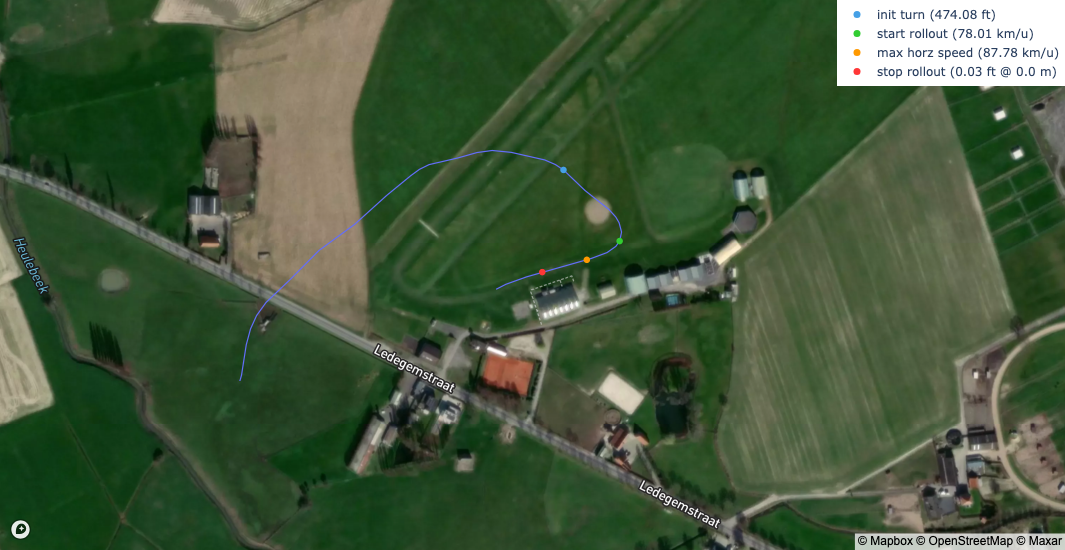

In [9]:
landing_viz.plt_map()

### Horizontal Speed

This plot illustrates your horizontal speed throughout the maneuver, helping you identify areas where you can improve your speed and agility.

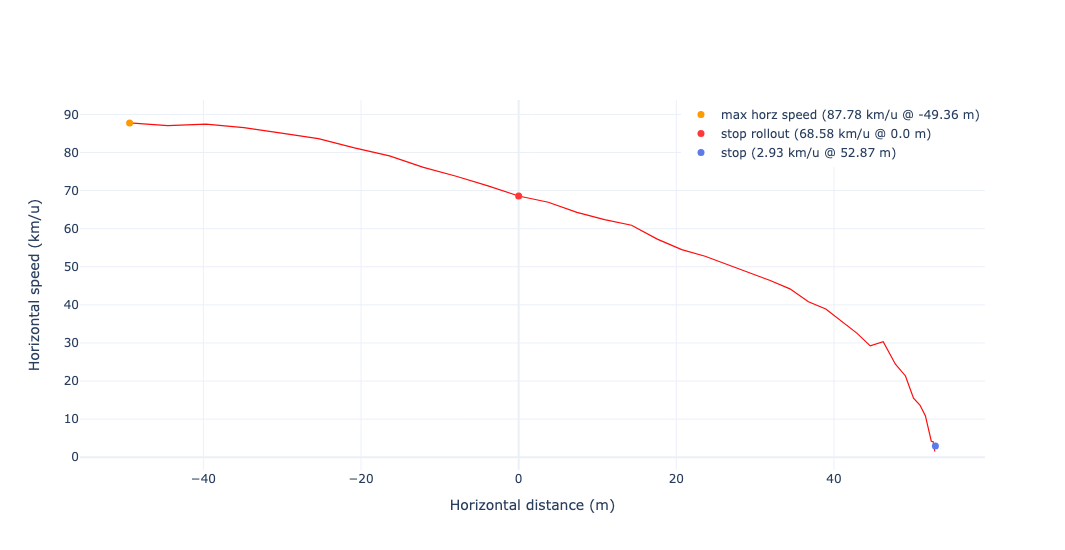

In [10]:
landing_viz.plt_speed()